In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.feature_selection import chi2

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning lab/Dataset/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
df = df.drop(columns=['Id'], axis=1)
print(df)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc=OrdinalEncoder()

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
enc.fit(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']])

OrdinalEncoder()

In [ ]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]=enc.transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8.0,14.0,4.0,1.0,0.0
1,6.0,9.0,4.0,1.0,0.0
2,4.0,11.0,3.0,1.0,0.0
3,3.0,10.0,5.0,1.0,0.0
4,7.0,15.0,4.0,1.0,0.0


In [ ]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

**Pearson correlation**

In [ ]:
X=df.iloc[:, 0:4]
Y=df.iloc[:, -1]

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,8.0,14.0,4.0,1.0
1,6.0,9.0,4.0,1.0
2,4.0,11.0,3.0,1.0
3,3.0,10.0,5.0,1.0
4,7.0,15.0,4.0,1.0


[]

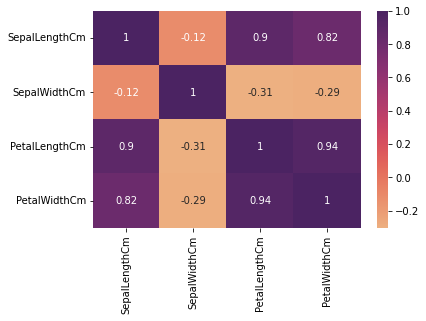

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='flare')
plt.plot()

[]

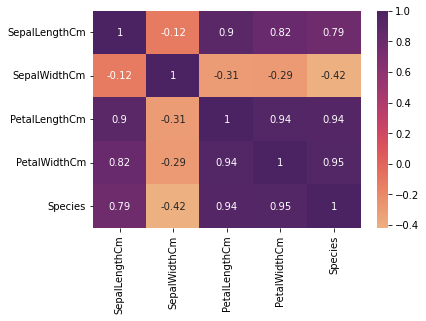

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='flare')
plt.plot()

**Chi square**

In [ ]:
f_score = chi2(X, Y) 

In [ ]:
f_score


(array([404.09098787, 113.7148847 , 980.27472527, 611.61869436]),
 array([1.78960379e-088, 2.02827358e-025, 1.36788010e-213, 1.54414473e-133]))

In [ ]:

f_score[1]


array([1.78960379e-088, 2.02827358e-025, 1.36788010e-213, 1.54414473e-133])

In [ ]:
pvalues =pd.Series(f_score[1])
pvalues.index = X.columns

In [ ]:
pvalues

SepalLengthCm     1.789604e-88
SepalWidthCm      2.028274e-25
PetalLengthCm    1.367880e-213
PetalWidthCm     1.544145e-133
dtype: float64

In [ ]:
pvalues.sort_values(ascending=False)

SepalWidthCm      2.028274e-25
SepalLengthCm     1.789604e-88
PetalWidthCm     1.544145e-133
PetalLengthCm    1.367880e-213
dtype: float64

**Chi Square between class and attribute**

In [ ]:
from scipy.stats import chisquare,chi2_contingency, power_divergence
from scipy import stats

In [ ]:
table = pd.crosstab(df['Species'],df['PetalLengthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 271.79999999999995 p-value 1.1775672327529825e-21


In [ ]:
table = pd.crosstab(df['Species'],df['PetalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 271.75 p-value 2.1648103108815957e-35


In [ ]:
table = pd.crosstab(df['Species'],df['SepalLengthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 156.26666666666668 p-value 6.665987344005466e-09


In [ ]:
table = pd.crosstab(df['Species'],df['SepalWidthCm']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 88.36446886446886 p-value 8.303947787862062e-05


**Coefficient**

In [ ]:
import numpy as np

In [ ]:
x, y = np.array(X), np.array(Y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
 model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9366813329224675


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: 0.14947984261659208


In [ ]:
print(f"coefficients: {model.coef_}")

coefficients: [-0.01142467 -0.02371489  0.03558066  0.06731971]
